In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplottoy.data import iris
from matplottoy.encoders import color, position
from matplottoy.artists import point, bar, utils

In [53]:

sns_iris = sns.load_dataset("iris")

In [54]:
table = iris.Iris(sns_iris)

In [55]:
cmap = {'setosa':'C0', 'versicolor':'C1', 'virginica':'C2'}
transforms = {'x': ('sepal_length', position.Identity()),       
              'y': ('sepal_width', position.Identity()),
              'facecolors':('species', color.Nominal(cmap))}


[(4.3, 7.9),
 (2.0, 4.4),
 Text(0.5, 0, 'sepal_length'),
 Text(0, 0.5, 'sepal_width'),
 None]

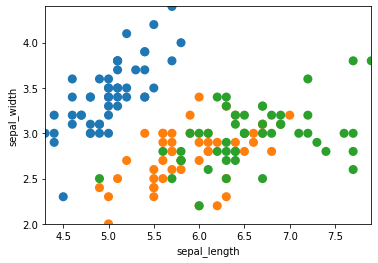

In [56]:
fig, ax = plt.subplots()

artist = point.Point(table, transforms)
ax.add_artist(artist)
ax.set(xlim = (table.view()[transforms['x'][0]].min(), 
               table.view()[transforms['x'][0]].max()), 
       ylim = (table.view()[transforms['y'][0]].min(), 
               table.view()[transforms['y'][0]].max()),       
       xlabel = transforms['x'][0], 
       ylabel = transforms['y'][0], 
       aspect='equal')


In [57]:
freq = sns_iris['species'].value_counts()

In [58]:
tfreq = iris.FrequencyBar(freq.index, freq.values)

In [59]:
tfreq.view()

{'category': Index(['versicolor', 'setosa', 'virginica'], dtype='object'),
 'count': array([50, 50, 50], dtype=int64)}

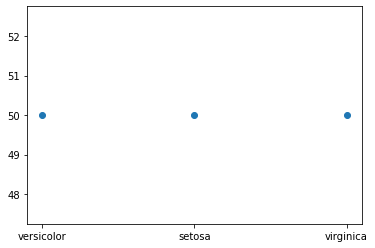

In [60]:
plt.scatter(freq.index, freq.values)

In [61]:
locs = {k:i for i,k in enumerate(tfreq.FB.F['category'].categories)}
fts = {'x':('category', position.Nominal(locs)),  
            'y':('count', position.Identity())}

[(-1.0, 4.0), (45.0, 55.0), None]

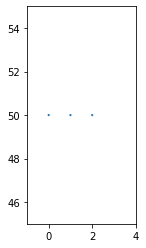

In [62]:
fig, ax = plt.subplots()

artist = point.Point(tfreq, fts)
ax.add_artist(artist)
ax.set(xlim = (-1,4), ylim=(45,55), aspect='equal')


In [63]:
fts = {'position':('category', position.Nominal(locs)),  
        'length':('count', position.Identity())}

[(-0.5, 3.5),
 (47.5, 52.5),
 Text(0.5, 0, 'category'),
 Text(0, 0.5, 'count'),
 None]

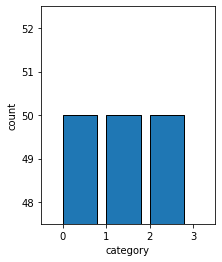

In [64]:
fig, ax = plt.subplots()

artist = bar.Bar(tfreq, fts)
ax.add_artist(artist)
ax.set(xlim = (-0.5, 3.5), 
       ylim = (tfreq.view()[fts['length'][0]].min(), 
               tfreq.view()[fts['length'][0]].max()),       
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], 
       aspect='equal')

[(-0.5, 3.5),
 (47.5, 52.5),
 Text(0.5, 0, 'category'),
 Text(0, 0.5, 'count'),
 None]

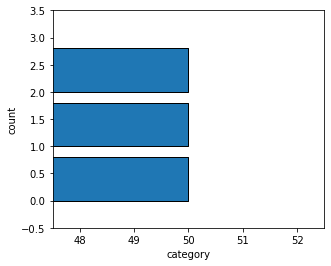

In [65]:
fig, ax = plt.subplots()

artist = bar.Bar(tfreq, fts, orientation='horizontal')
ax.add_artist(artist)
ax.set(ylim = (-0.5, 3.5), 
       xlim = (tfreq.view()[fts['length'][0]].min(), 
               tfreq.view()[fts['length'][0]].max()),       
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], 
       aspect='equal')

# grouped bar

In [66]:
df = sns_iris.groupby('species').mean().reset_index()
df 

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [67]:
df['sepal_length_color'] = ['lightcoral', 'indianred', 'firebrick']
df['sepal_width_color'] = ['yellowgreen', 'olivedrab', 'darkolivegreen']
df['petal_length_color'] = ['lightskyblue', 'deepskyblue', 'steelblue']
df['petal_width_color'] = ['plum', 'deeppink', 'darkmagenta']


In [68]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_length_color,sepal_width_color,petal_length_color,petal_width_color
0,setosa,5.006,3.428,1.462,0.246,lightcoral,yellowgreen,lightskyblue,plum
1,versicolor,5.936,2.770,4.260,1.326,indianred,olivedrab,deepskyblue,deeppink
2,virginica,6.588,2.974,5.552,2.026,firebrick,darkolivegreen,steelblue,darkmegenta


In [76]:
bt = iris.Iris(df)

ValueError: petal_width_color has values that are invalid <matplottoy.encoders.mtypes.Color object at 0x00000189BD78F8B0>

In [20]:
bt.view()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_length_color,sepal_width_color,petal_length_color,petal_width_color
0,setosa,5.006,3.428,1.462,0.246,C0,C1,C2,C3
1,versicolor,5.936,2.770,4.260,1.326,C0,C1,C2,C3
2,virginica,6.588,2.974,5.552,2.026,C0,C1,C2,C3


<AxesSubplot:>

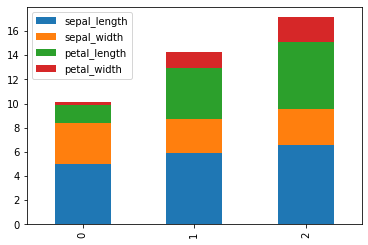

In [21]:
bt.view().plot.bar(stacked=True)

In [22]:
gts = {'position': ('species', position.Nominal(locs)),  
        'length':(['sepal_length', 'sepal_width', 
                   'petal_length', 'petal_width'],             
                    position.Identity()),
        'color': (['sepal_length_color', 'sepal_width_color', 
                   'petal_length_color', 'petal_width_color'],
                   color.Identity())}
        

In [23]:
gts.items()

dict_items([('position', ('species', <matplottoy.encoders.position.Nominal object at 0x00000189B9A01610>)), ('length', (['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], <matplottoy.encoders.position.Identity object at 0x00000189B9A01F10>)), ('color', (['sepal_length_color', 'sepal_width_color', 'petal_length_color', 'petal_width_color'], <matplottoy.encoders.color.Identity object at 0x00000189B99FBCA0>))])

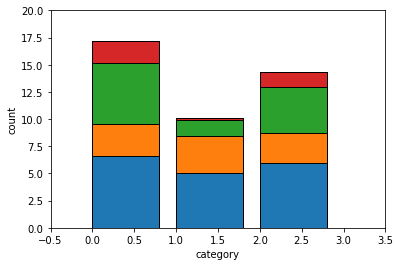

In [30]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=True)
ax.add_artist(artist)
_ = ax.set(ylim = (0, 20), 
       xlim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )


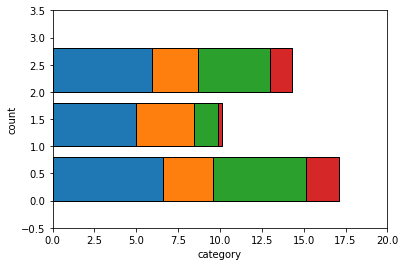

In [31]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='h', stacked=True)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 20), 
       ylim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

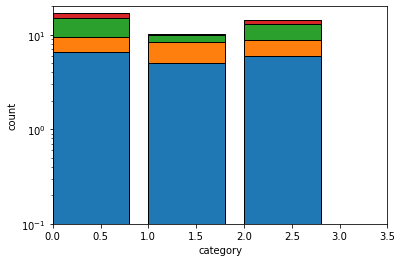

In [32]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=True)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 3.5), 
       ylim = (0.1, 20),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], 
       yscale = 'log')

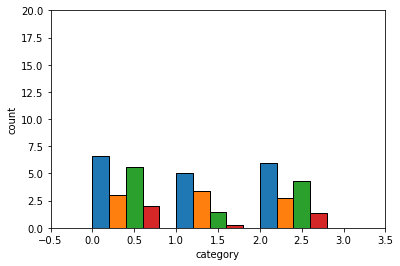

In [33]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='v', stacked=False)
ax.add_artist(artist)
_ = ax.set(ylim = (0, 20), 
       xlim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

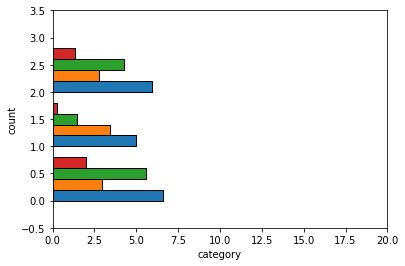

In [34]:
fig, ax = plt.subplots()
artist = bar.MultiBar(bt, gts, orientation='h', stacked=False)
ax.add_artist(artist)
_ = ax.set(xlim = (0, 20), 
       ylim = (-.5, 3.5),   
       xlabel = fts['position'][0], 
       ylabel = fts['length'][0], )

In [42]:
import matplotlib.colors as mcolors